Packages Required

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as mplt
from pylab import *

In [8]:
def plot_heatmap(input_file, col_anno, row_anno):

  #Reading input file
  input_data = pd.read_csv(input_file)
  input_data.index = input_data.iloc[:,0]
  input_data = input_data.drop(columns = input_data.columns[0])

  #Reading row and column annotation file
  col_anno = pd.read_csv(col_anno)
  row_anno = pd.read_csv(row_anno)
  
  #Changing column names of input data with column annotaion
  input_data.columns = col_anno['cellType']

  #Number of celltype defined
  uni_col = col_anno['cellType'].unique()
  uni_row = row_anno['cellType_1'].unique()

  #Changing row annotation file rowname
  row_anno.index = row_anno.iloc[:,0]
  row_anno_col = row_anno.columns[1:6]

  #Defining widths and heights of subplots
  widths = [0.1,0.1,0.1,0.1,0.1,2,6,4,1,3,2,1,2]
  heights = [8]*8
  gs_kw = dict(width_ratios=widths, height_ratios=heights)

  #Defining colors for cmap
  cmap_list = ("Blues","Greens","Reds","Purples","gray_r")


  #Defining figure size and suplot dimensions
  fig, axn = mplt.subplots(len(uni_col), len(uni_col)+len(row_anno_col),
                           sharex='col', sharey='row', gridspec_kw=gs_kw,figsize=(100, 50))
  cbar_ax = fig.add_axes([.91, .3, .01, .4])

  for r, row in enumerate(axn):
    for c, ax in enumerate(row):
      if (c <= (len(row_anno_col)-1)):
        
        if (r == len(uni_col)-1):
          h= sns.heatmap(pd.DataFrame(row_anno.loc[row_anno['cellType_1'] == uni_row[r], row_anno_col[c]]),
                        xticklabels= False,yticklabels= False,cmap = cmap_list[c],
                        ax=ax, cbar= c+1, vmin=0, vmax=1,
                        cbar_kws={"orientation": "horizontal"})
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)
          h.set_xlabel("")
          cbar = h.collections[0].colorbar
          cbar.set_label(row_anno_col[c], rotation = 90, fontsize = 50)
                  
        else:
          h= sns.heatmap(pd.DataFrame(row_anno.loc[row_anno['cellType_1'] == uni_row[r], row_anno_col[c]]),
                        xticklabels=False, yticklabels= False,cmap = cmap_list[c],
                        ax=ax, cbar= None, vmin=0, vmax=1)
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)
          h.set_xlabel("")
              
        if (c==0):
          ax.set_ylabel(uni_row[r], fontsize = 80)
        else:
          h.set_ylabel("")

      else:
        if ((c-len(row_anno_col)) < len(uni_col)-1):      
          
          h= sns.heatmap(input_data[uni_col[c-len(row_anno_col)]].loc[row_anno['Unnamed: 0'][row_anno['cellType_1'] == uni_row[r]]],
                        xticklabels=False, yticklabels= False,cmap = 'flare',
                        ax=ax, cbar= r == 0, vmin=0, vmax=1,cbar_ax=None if r else cbar_ax)
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)

                  
        else:
          h= sns.heatmap(input_data[uni_col[c-len(row_anno_col)]].loc[row_anno['Unnamed: 0'][row_anno['cellType_1'] == uni_row[r]]], ax=ax,
                    xticklabels=False,cmap = 'flare', cbar= r == 0,vmin=0, vmax=1,cbar_ax=None if r else cbar_ax)
          h.tick_params(right=True,left =False, labelright=True, labelleft=False, rotation=0)

        if(r==0):
          ax.set_title(uni_col[c-len(row_anno_col)], fontsize =80)
        h.set_xlabel("")
        h.set_ylabel("")

        if(r == (c-len(row_anno_col))):
          autoAxis = ax.axis()
          rec = Rectangle((autoAxis[0]+0.7,autoAxis[2]+0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=10)
          rec = ax.add_patch(rec)
          rec.set_clip_on(False)




  mplt.savefig("result.png", dpi =120)
  return h






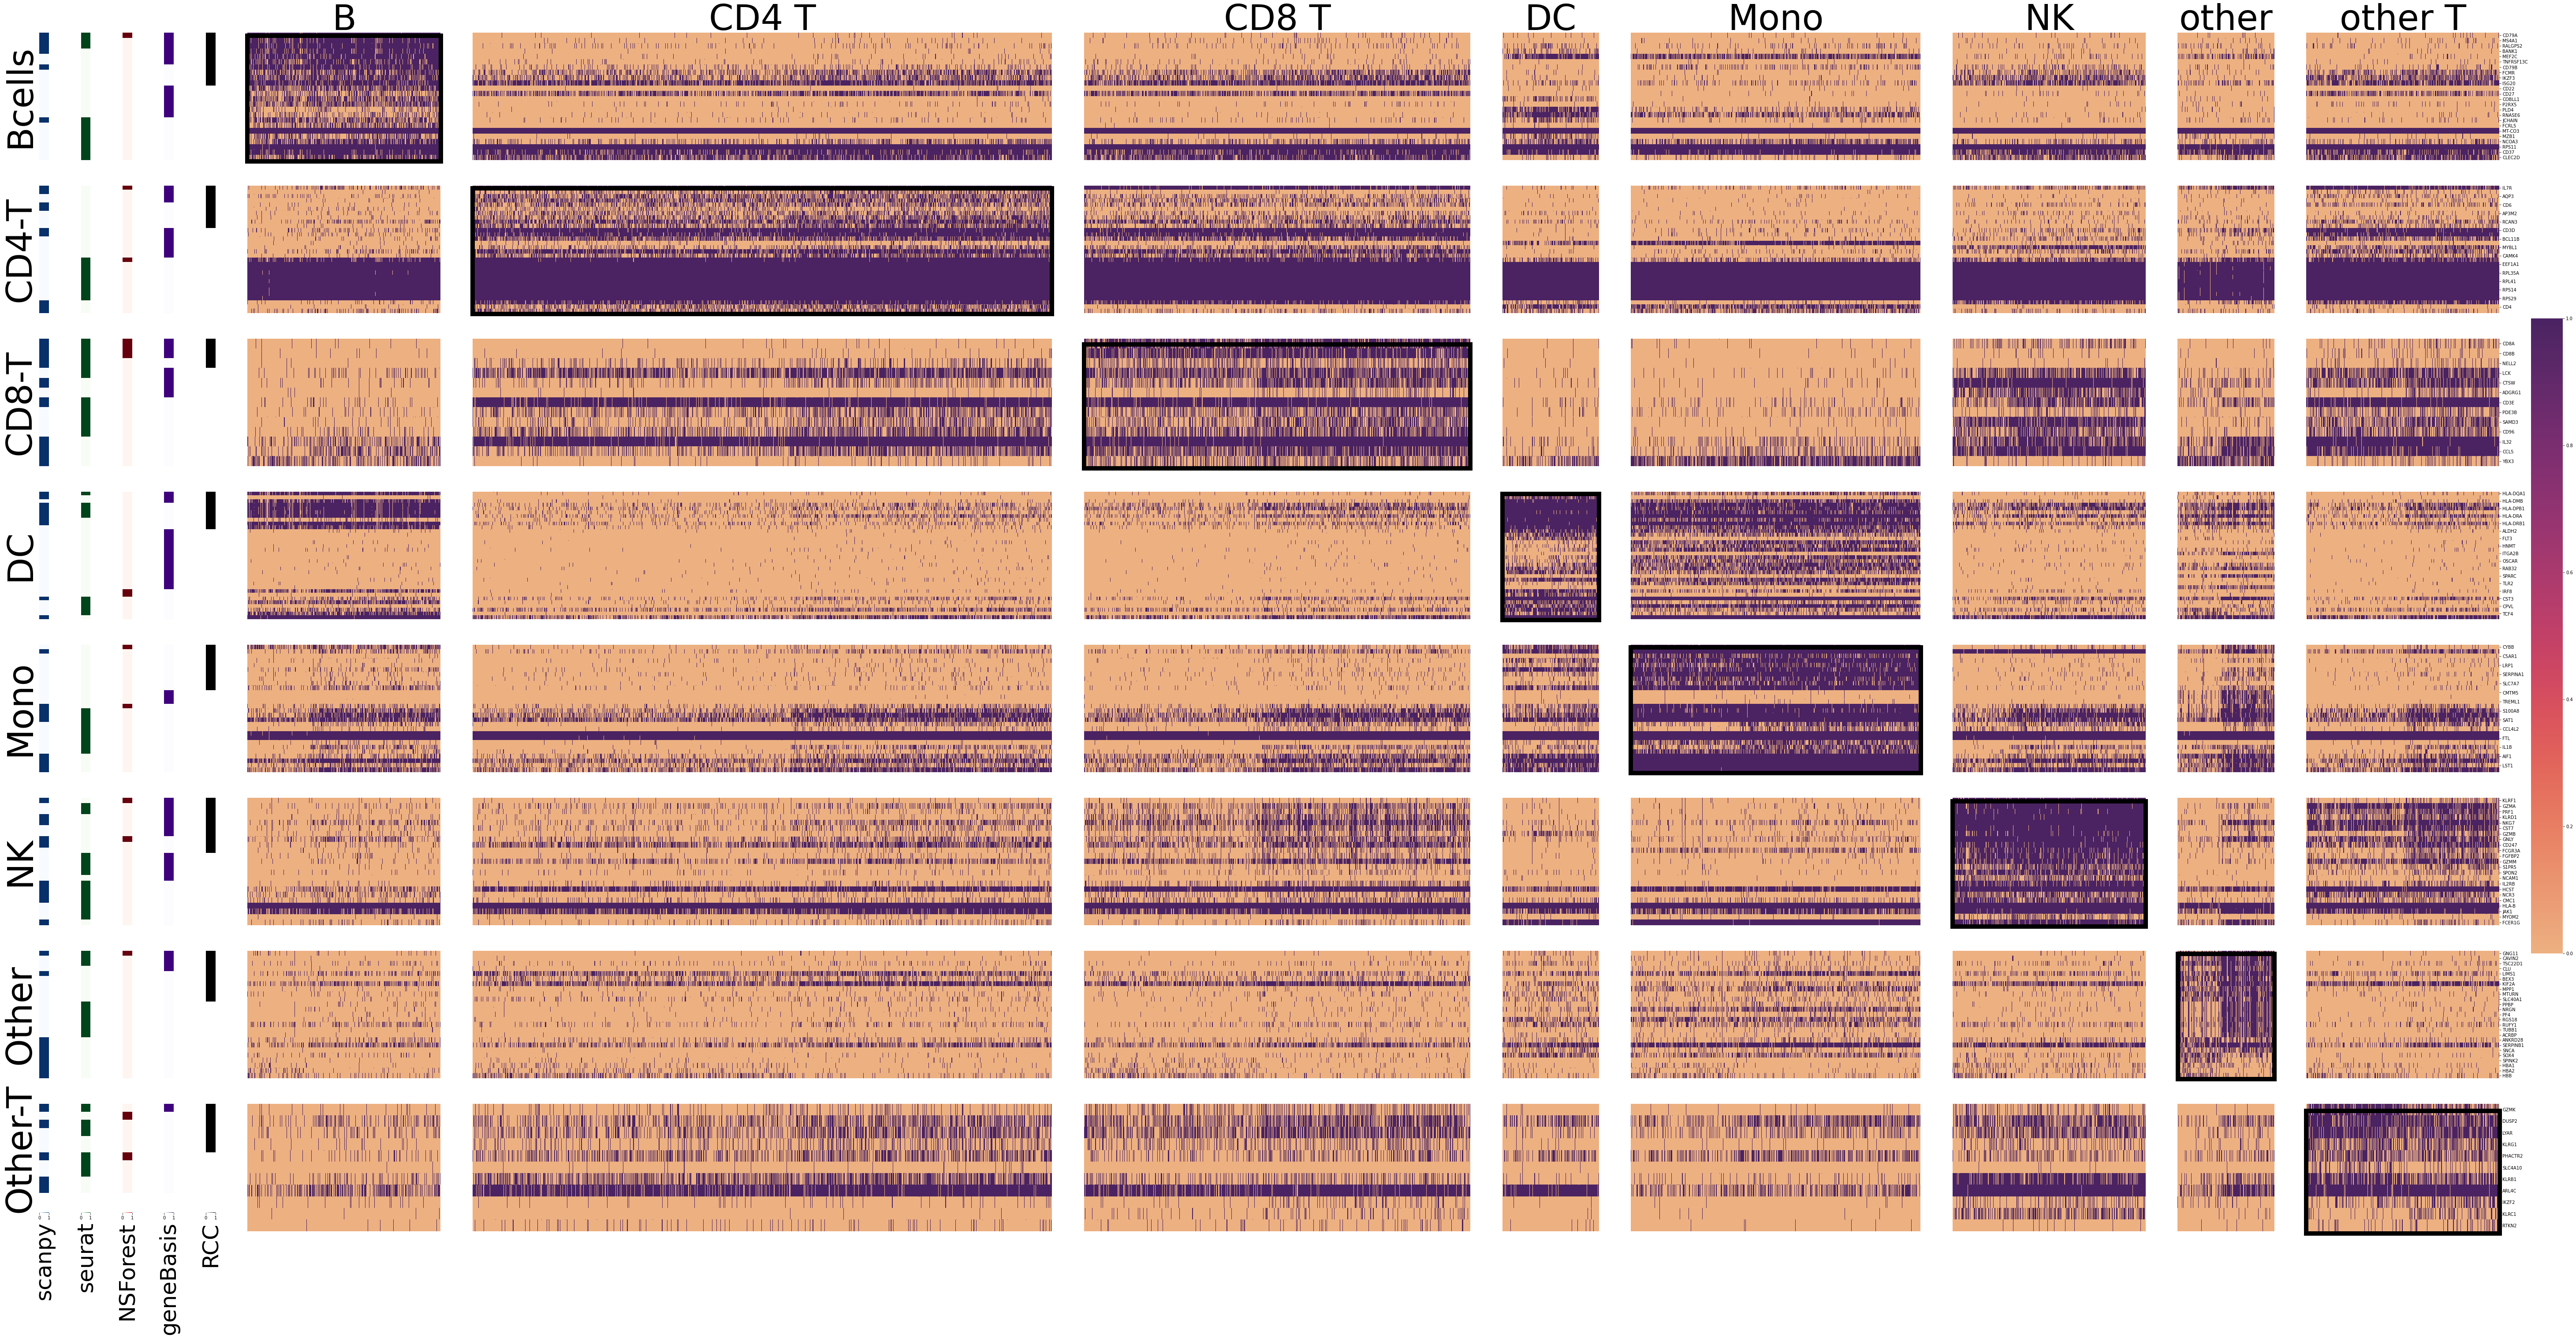

In [9]:
plot_heatmap(input_file= "input.csv", col_anno= "columnAnno.csv",
             row_anno= "rowAnno.csv")